In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df = pd.read_csv("tmdb_cleaned_data_with_credits.csv")

print(f"Data loaded successfully!")
print(f"Shape: {df.shape}")
df.head(5)

Data loaded successfully!
Shape: (18, 26)


,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,backdrop_path,origin_country,profit_musd,ROI,cast,cast_size,director,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,United States of America,26844,8.238,16.4257,181.0,After the devastating events of Avengers: Infi...,English|Japanese|Xhosa,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,['US'],2443.439100,7.863593,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,603
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,United States of America|United Kingdom,32718,7.594,23.4542,162.0,"In the 22nd century, a paraplegic Marine is di...",English|Spanish,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,['US'],2686.706026,12.336312,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,990
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,United States of America,20021,7.255,10.9108,136.0,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,['US'],1823.223624,8.441729,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,183,J.J. Abrams,261
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,United States of America,31061,8.200,32.9393,149.0,As the Avengers and their allies have continue...,English|Xhosa,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,['US'],1752.415039,6.841383,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo|Anthony Russo,730
4,597,Titanic,Nothing on earth could come between them.,1997-11-18,Drama|Romance,NaN,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,United States of America,26408,7.905,26.1517,194.0,101-year-old Rose DeWitt Bukater tells the sto...,English|French|German|Swedish|Italian|Russian,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,/tupgjqhWx5oieQrdyesO3aclUX9.jpg,['US'],2064.162353,11.320812,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,117,James Cameron,262


In [37]:
'''print("\nCHECKING FOR ADDED COLUMNS:")
expected_columns = ['profit_musd', 'ROI', 'cast', 'cast_size', 'director', 'crew_size']
for col in expected_columns:
    if col in df.columns:
        print(f"{col} - PRESENT")
    else:
        print(f"{col} - MISSING")

print("\nFRANCHISE DATA CHECK:")
print(f"   Movies with franchise data: {df['belongs_to_collection'].notna().sum()}")
print(f"   Standalone movies: {df['belongs_to_collection'].isna().sum()}")'''

'print("\nCHECKING FOR ADDED COLUMNS:")\nexpected_columns = [\'profit_musd\', \'ROI\', \'cast\', \'cast_size\', \'director\', \'crew_size\']\nfor col in expected_columns:\n    if col in df.columns:\n        print(f"{col} - PRESENT")\n    else:\n        print(f"{col} - MISSING")\n\nprint("\nFRANCHISE DATA CHECK:")\nprint(f"   Movies with franchise data: {df[\'belongs_to_collection\'].notna().sum()}")\nprint(f"   Standalone movies: {df[\'belongs_to_collection\'].isna().sum()}")'

In [38]:
'''print("\nNUMERICAL COLUMNS SUMMARY:")
display(df.describe())

print("\nMISSING VALUES CHECK:")
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
if len(missing_data) > 0:
    print(missing_data)
else:
    print("   No missing values!")'''

'print("\nNUMERICAL COLUMNS SUMMARY:")\ndisplay(df.describe())\n\nprint("\nMISSING VALUES CHECK:")\nmissing_data = df.isnull().sum()\nmissing_data = missing_data[missing_data > 0].sort_values(ascending=False)\nif len(missing_data) > 0:\n    print(missing_data)\nelse:\n    print("   No missing values!")'

   ✓ Saved: revenue_vs_budget.png


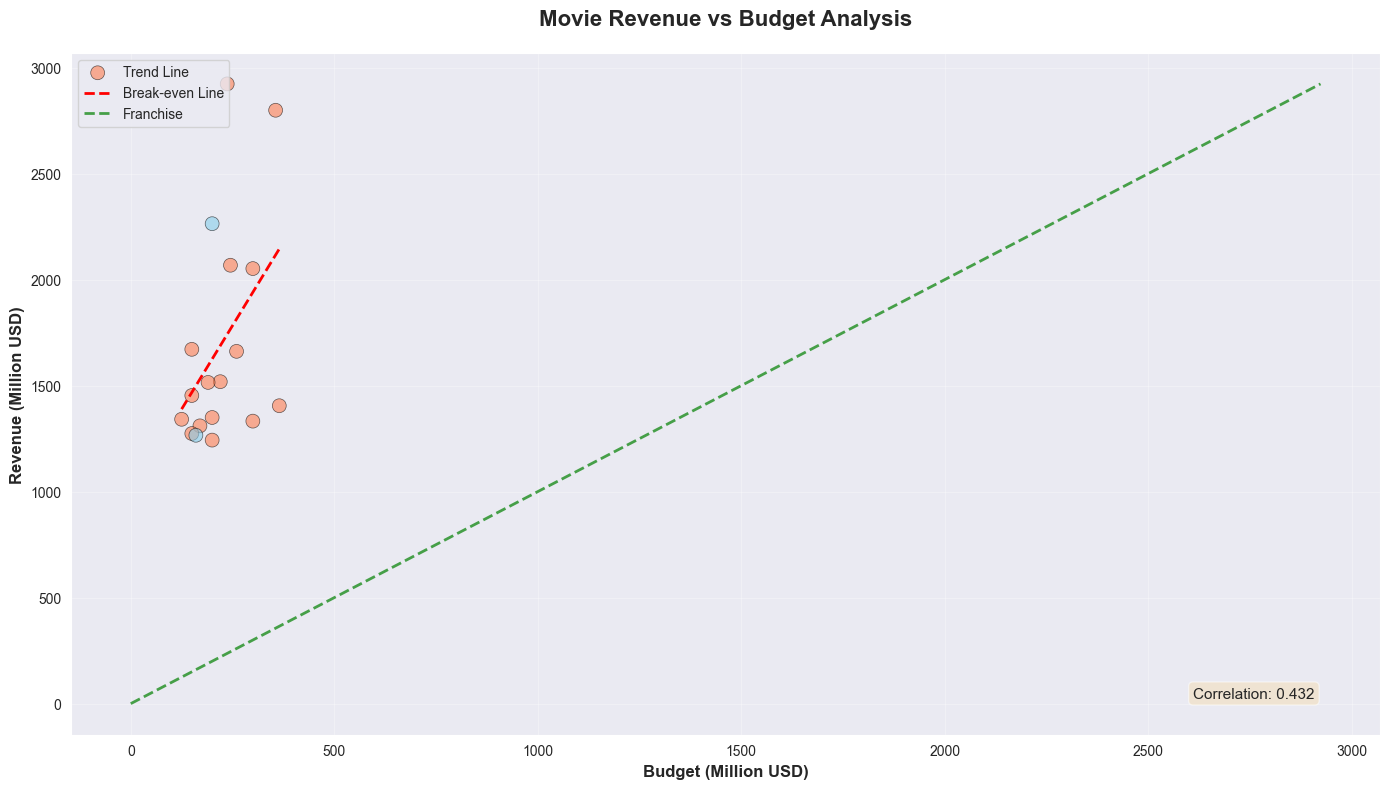

In [39]:
fig, ax = plt.subplots(figsize=(14, 8))

# Filter out movies with zero budget or revenue for better visualization
plot_df = df[(df['budget_musd'] > 0) & (df['revenue_musd'] > 0)].copy()

# Color by franchise status
plot_df['is_franchise'] = plot_df['belongs_to_collection'].notna()
colors = plot_df['is_franchise'].map({True: 'coral', False: 'skyblue'})

# Create scatter plot
scatter = ax.scatter(plot_df['budget_musd'], 
                     plot_df['revenue_musd'],
                     c=colors,
                     alpha=0.6,
                     s=100,
                     edgecolors='black',
                     linewidth=0.5)

# Add trend line
z = np.polyfit(plot_df['budget_musd'], plot_df['revenue_musd'], 1)
p = np.poly1d(z)
ax.plot(plot_df['budget_musd'].sort_values(), 
        p(plot_df['budget_musd'].sort_values()), 
        "r--", 
        linewidth=2, 
        label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')

# Add break-even line
max_val = max(plot_df['budget_musd'].max(), plot_df['revenue_musd'].max())
ax.plot([0, max_val], [0, max_val], 'g--', linewidth=2, alpha=0.7, label='Break-even line')

# Labels and formatting
ax.set_xlabel('Budget (Million USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Revenue (Million USD)', fontsize=12, fontweight='bold')
ax.set_title('Movie Revenue vs Budget Analysis', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.legend(['Trend Line', 'Break-even Line', 'Franchise', 'Standalone'], 
          loc='upper left', fontsize=10)

# Add correlation coefficient
corr = plot_df['budget_musd'].corr(plot_df['revenue_musd'])
ax.text(0.95, 0.05, f'Correlation: {corr:.3f}', 
        transform=ax.transAxes, 
        fontsize=11, 
        verticalalignment='bottom',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('revenue_vs_budget.png', dpi=300, bbox_inches='tight')
print("   ✓ Saved: revenue_vs_budget.png")
plt.show()

C:\Users\AngelaTenkorang\AppData\Local\Temp\ipykernel_8896\2721394693.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genre_roi_filtered,
C:\Users\AngelaTenkorang\AppData\Local\Temp\ipykernel_8896\2721394693.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


   ✓ Saved: roi_by_genre.png


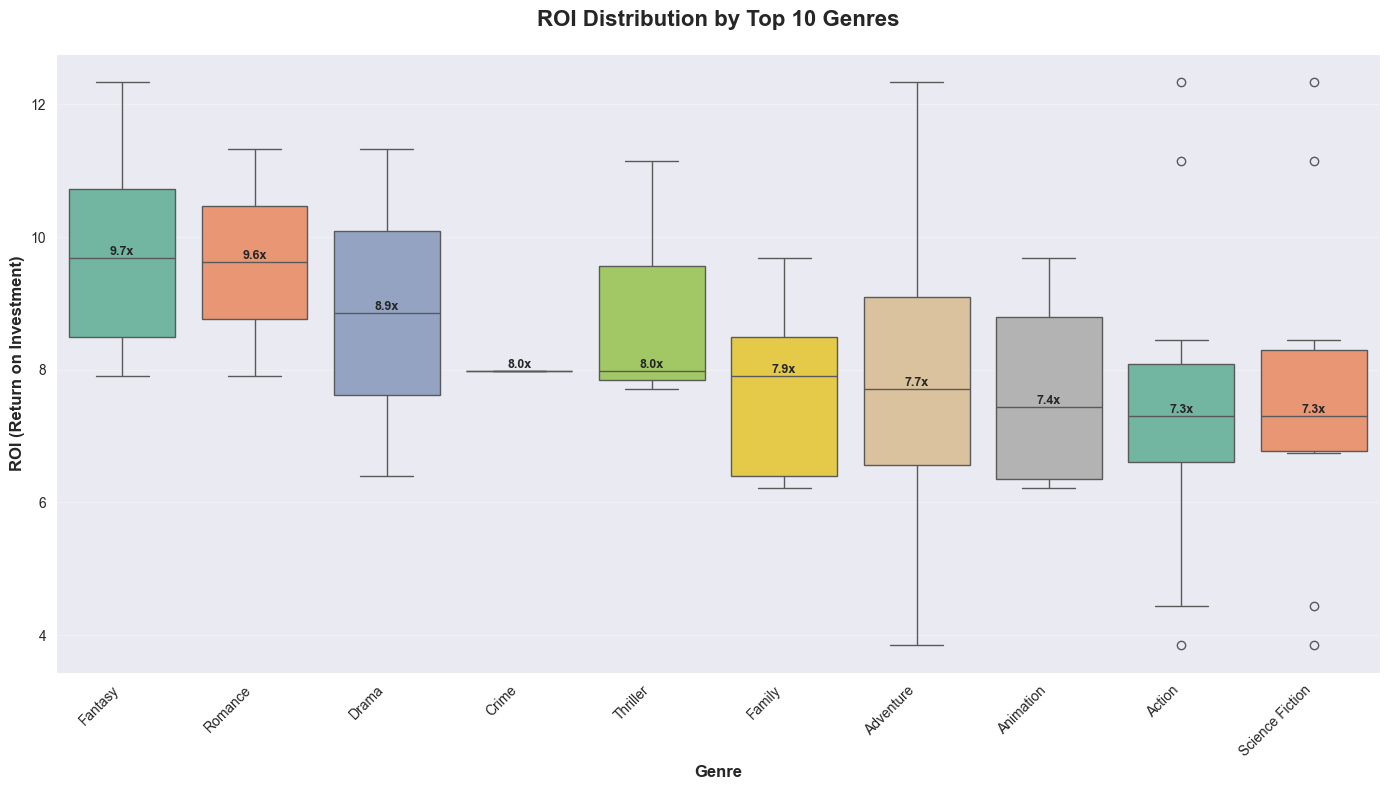

In [40]:

genre_roi_data = []
for idx, row in df.iterrows():
    if pd.notna(row['genres']) and pd.notna(row['ROI']) and row['ROI'] > 0:
        genres = row['genres'].split('|')
        for genre in genres:
            genre_roi_data.append({
                'genre': genre.strip(),
                'ROI': row['ROI']
            })

genre_roi_df = pd.DataFrame(genre_roi_data)

# Get top genres by count
top_genres = genre_roi_df['genre'].value_counts().head(10).index.tolist()
genre_roi_filtered = genre_roi_df[genre_roi_df['genre'].isin(top_genres)]

# Create boxplot
fig, ax = plt.subplots(figsize=(14, 8))

# Sort genres by median ROI
genre_order = genre_roi_filtered.groupby('genre')['ROI'].median().sort_values(ascending=False).index

sns.boxplot(data=genre_roi_filtered, 
            x='genre', 
            y='ROI', 
            order=genre_order,
            palette='Set2',
            ax=ax)

ax.set_xlabel('Genre', fontsize=12, fontweight='bold')
ax.set_ylabel('ROI (Return on Investment)', fontsize=12, fontweight='bold')
ax.set_title('ROI Distribution by Top 10 Genres', fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')

# Add median values on top
medians = genre_roi_filtered.groupby('genre')['ROI'].median()[genre_order]
for i, (genre, median) in enumerate(medians.items()):
    ax.text(i, median, f'{median:.1f}x', 
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('roi_by_genre.png', dpi=300, bbox_inches='tight')
print("   ✓ Saved: roi_by_genre.png")
plt.show()

   ✓ Saved: popularity_vs_rating.png


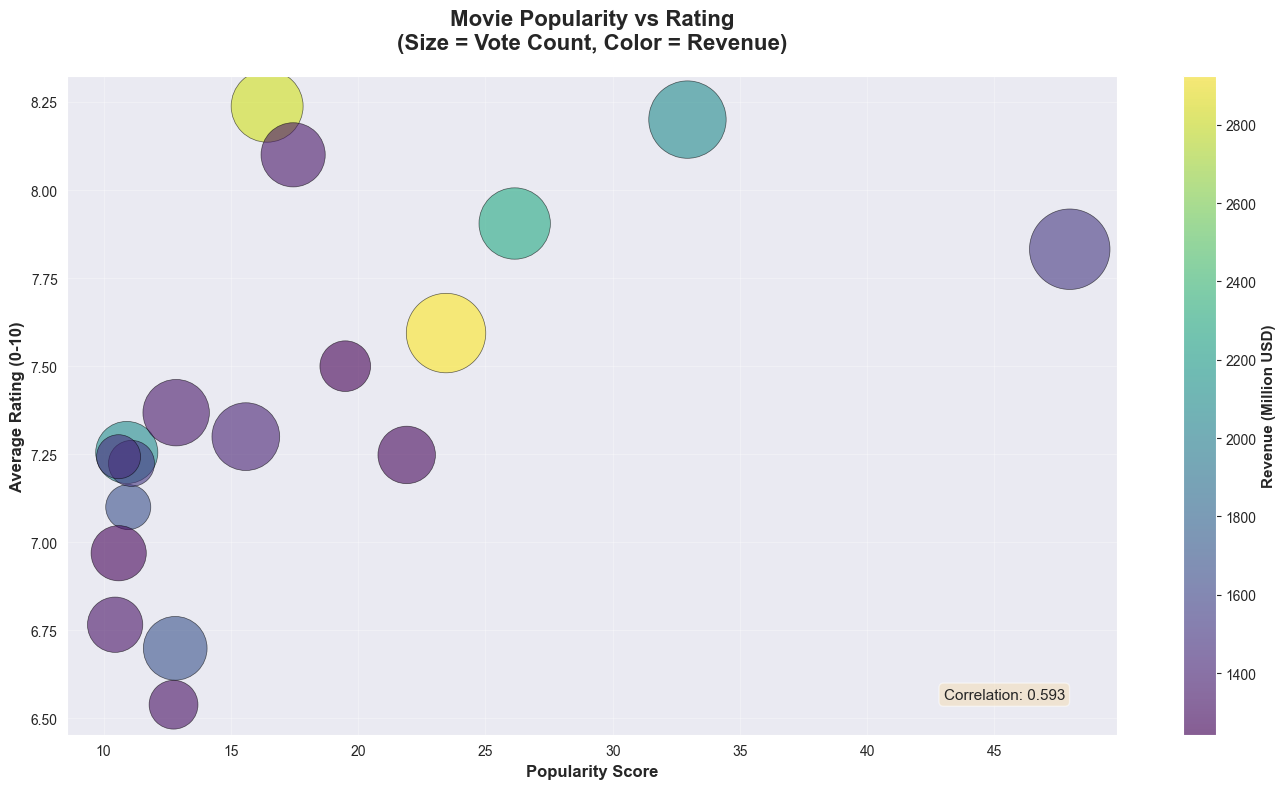

In [41]:
fig, ax = plt.subplots(figsize=(14, 8))

# Filter movies with sufficient votes
plot_df = df[df['vote_count'] >= 10].copy()

# Create scatter plot with size based on vote count
scatter = ax.scatter(plot_df['popularity'], 
                     plot_df['vote_average'],
                     s=plot_df['vote_count']/10,  # Size based on vote count
                     c=plot_df['revenue_musd'],  # Color based on revenue
                     cmap='viridis',
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Revenue (Million USD)', fontsize=11, fontweight='bold')

# Labels and formatting
ax.set_xlabel('Popularity Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Rating (0-10)', fontsize=12, fontweight='bold')
ax.set_title('Movie Popularity vs Rating\n(Size = Vote Count, Color = Revenue)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)

# Add correlation
corr = plot_df['popularity'].corr(plot_df['vote_average'])
ax.text(0.95, 0.05, f'Correlation: {corr:.3f}', 
        transform=ax.transAxes, 
        fontsize=11,
        verticalalignment='bottom',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('popularity_vs_rating.png', dpi=300, bbox_inches='tight')
print("   ✓ Saved: popularity_vs_rating.png")
plt.show()


📊 Creating Visualization 4: Yearly Box Office Trends...
   ✓ Saved: yearly_trends.png


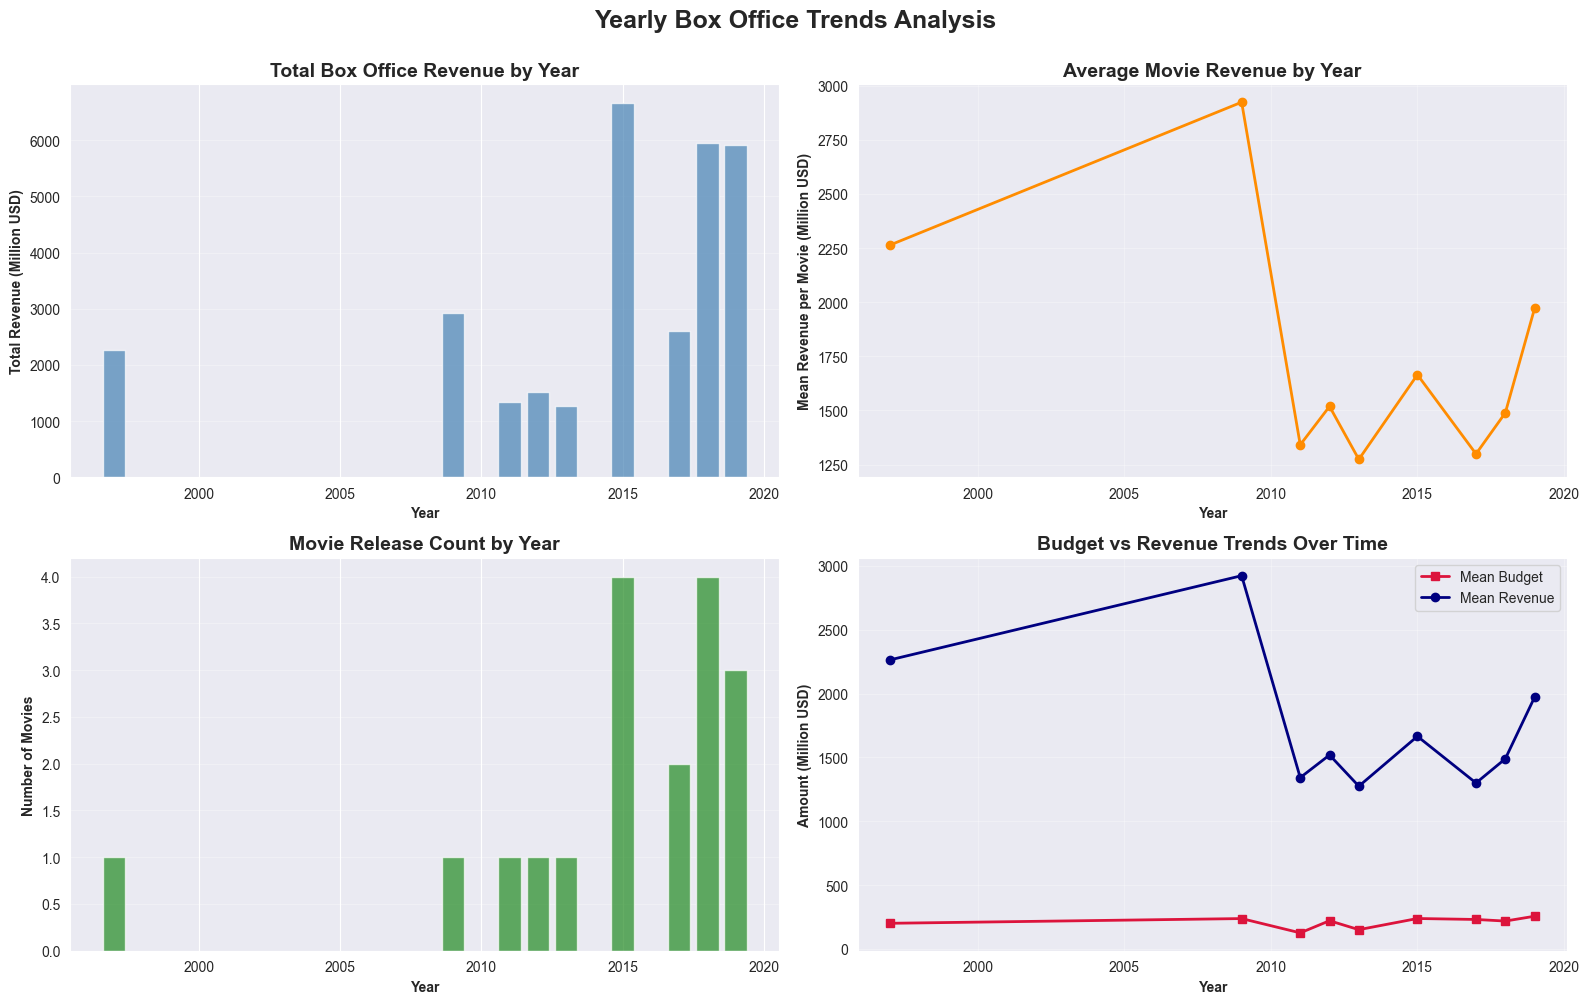

In [42]:
print("\n📊 Creating Visualization 4: Yearly Box Office Trends...")

# Extract year from release_date
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Group by year
yearly_stats = df.groupby('release_year').agg({
    'revenue_musd': ['sum', 'mean', 'count'],
    'budget_musd': ['sum', 'mean']
}).round(2)

yearly_stats.columns = ['Total Revenue', 'Mean Revenue', 'Movie Count', 
                        'Total Budget', 'Mean Budget']
yearly_stats = yearly_stats.reset_index()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Total Revenue by Year
axes[0, 0].bar(yearly_stats['release_year'], 
               yearly_stats['Total Revenue'], 
               color='steelblue', 
               alpha=0.7)
axes[0, 0].set_xlabel('Year', fontweight='bold')
axes[0, 0].set_ylabel('Total Revenue (Million USD)', fontweight='bold')
axes[0, 0].set_title('Total Box Office Revenue by Year', fontweight='bold', fontsize=14)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Plot 2: Mean Revenue by Year
axes[0, 1].plot(yearly_stats['release_year'], 
                yearly_stats['Mean Revenue'], 
                marker='o', 
                linewidth=2, 
                color='darkorange',
                markersize=6)
axes[0, 1].set_xlabel('Year', fontweight='bold')
axes[0, 1].set_ylabel('Mean Revenue per Movie (Million USD)', fontweight='bold')
axes[0, 1].set_title('Average Movie Revenue by Year', fontweight='bold', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Number of Movies by Year
axes[1, 0].bar(yearly_stats['release_year'], 
               yearly_stats['Movie Count'], 
               color='forestgreen', 
               alpha=0.7)
axes[1, 0].set_xlabel('Year', fontweight='bold')
axes[1, 0].set_ylabel('Number of Movies', fontweight='bold')
axes[1, 0].set_title('Movie Release Count by Year', fontweight='bold', fontsize=14)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Budget vs Revenue Trends
axes[1, 1].plot(yearly_stats['release_year'], 
                yearly_stats['Mean Budget'], 
                marker='s', 
                linewidth=2, 
                label='Mean Budget',
                color='crimson')
axes[1, 1].plot(yearly_stats['release_year'], 
                yearly_stats['Mean Revenue'], 
                marker='o', 
                linewidth=2, 
                label='Mean Revenue',
                color='navy')
axes[1, 1].set_xlabel('Year', fontweight='bold')
axes[1, 1].set_ylabel('Amount (Million USD)', fontweight='bold')
axes[1, 1].set_title('Budget vs Revenue Trends Over Time', fontweight='bold', fontsize=14)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Yearly Box Office Trends Analysis', fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('yearly_trends.png', dpi=300, bbox_inches='tight')
print("   ✓ Saved: yearly_trends.png")
plt.show()


📊 Creating Visualization 5: Franchise vs Standalone Comparison...
   ✓ Saved: franchise_vs_standalone.png


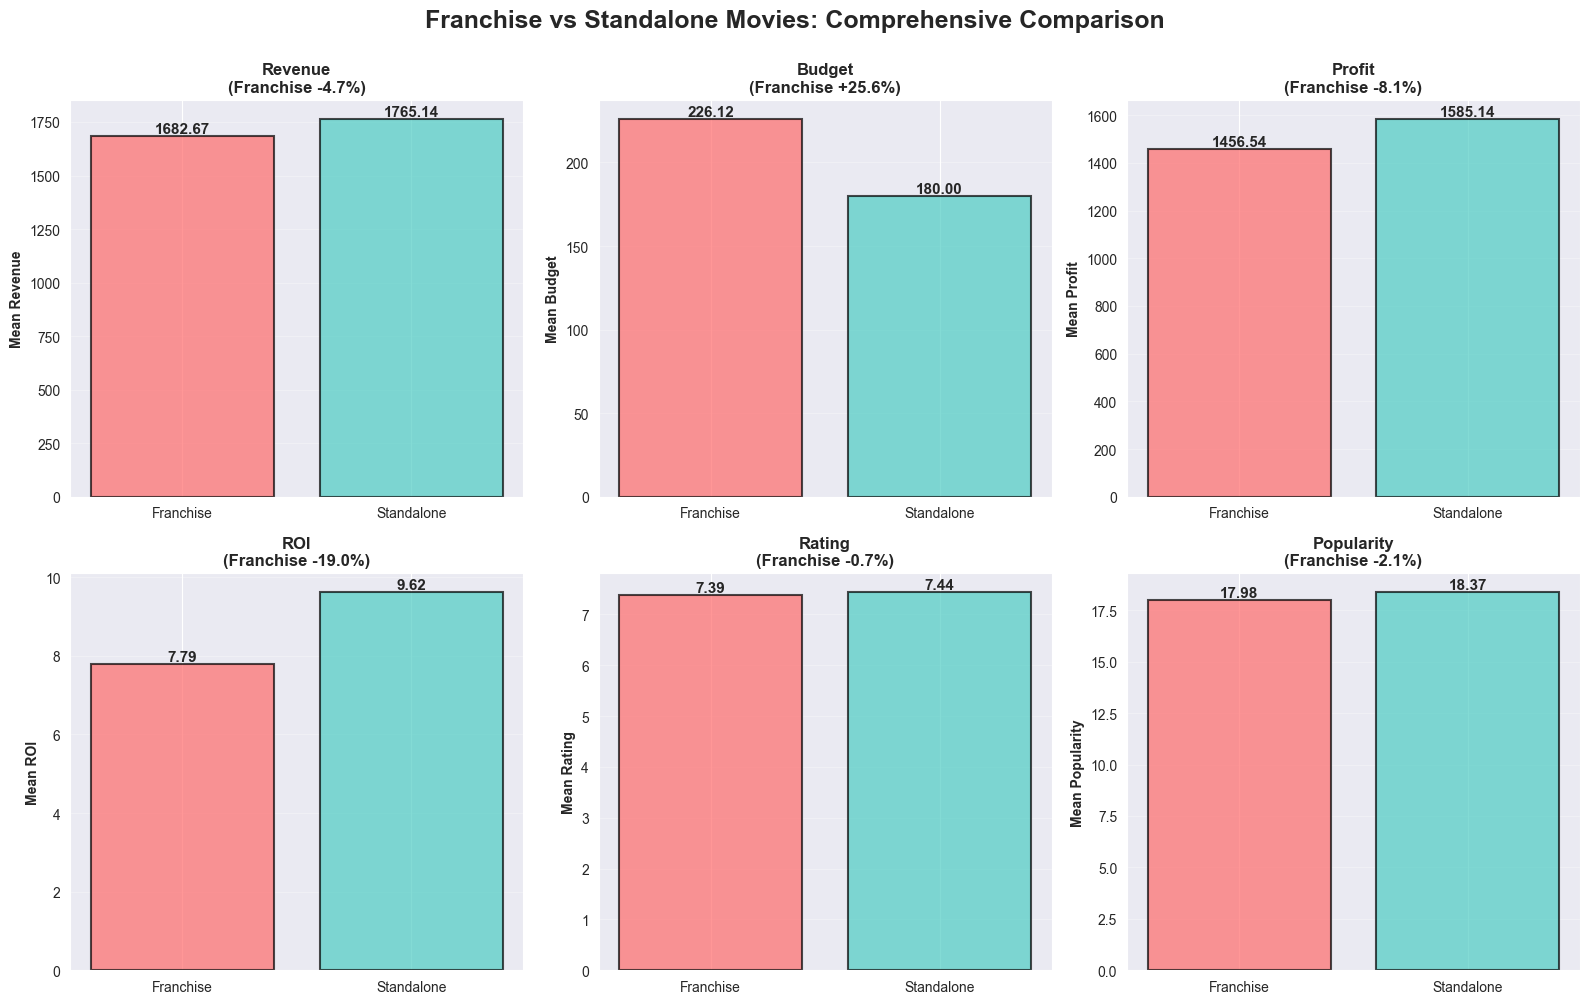

In [43]:
print("\n📊 Creating Visualization 5: Franchise vs Standalone Comparison...")

# Separate data
franchise_movies = df[df['belongs_to_collection'].notna()].copy()
standalone_movies = df[df['belongs_to_collection'].isna()].copy()

# Prepare comparison data
metrics = ['Revenue', 'Budget', 'Profit', 'ROI', 'Rating', 'Popularity']
franchise_values = [
    franchise_movies['revenue_musd'].mean(),
    franchise_movies['budget_musd'].mean(),
    franchise_movies['profit_musd'].mean(),
    franchise_movies['ROI'].median(),
    franchise_movies['vote_average'].mean(),
    franchise_movies['popularity'].mean()
]
standalone_values = [
    standalone_movies['revenue_musd'].mean(),
    standalone_movies['budget_musd'].mean(),
    standalone_movies['profit_musd'].mean(),
    standalone_movies['ROI'].median(),
    standalone_movies['vote_average'].mean(),
    standalone_movies['popularity'].mean()
]

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4']

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    x = ['Franchise', 'Standalone']
    y = [franchise_values[i], standalone_values[i]]
    
    bars = ax.bar(x, y, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Calculate percentage difference
    pct_diff = ((franchise_values[i] - standalone_values[i]) / standalone_values[i] * 100)
    
    ax.set_ylabel(f'Mean {metric}', fontweight='bold')
    ax.set_title(f'{metric}\n(Franchise {"+" if pct_diff > 0 else ""}{pct_diff:.1f}%)', 
                 fontweight='bold', fontsize=12)
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Franchise vs Standalone Movies: Comprehensive Comparison', 
             fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('franchise_vs_standalone.png', dpi=300, bbox_inches='tight')
print("   ✓ Saved: franchise_vs_standalone.png")
plt.show()